In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


sns.set_theme(style="white")

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


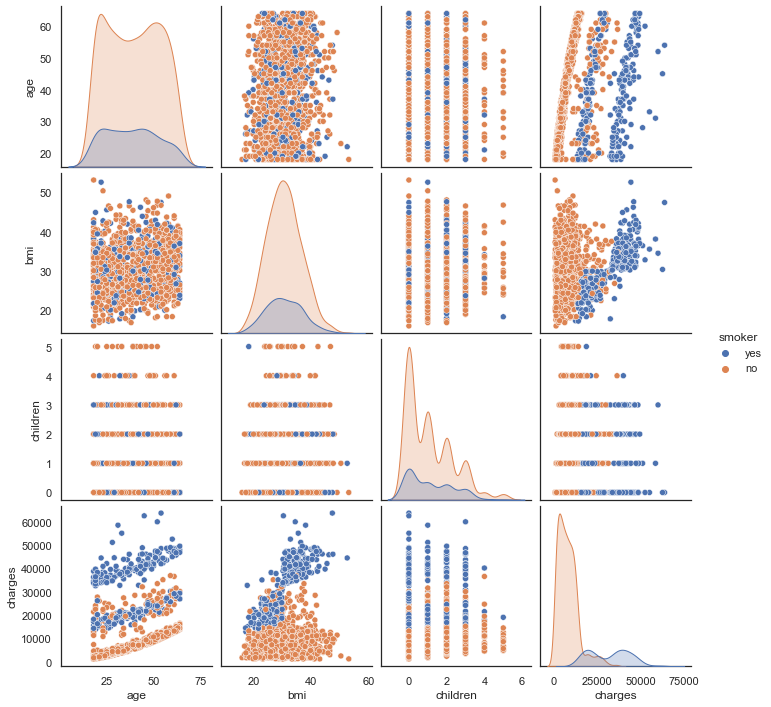

In [7]:
sns.pairplot(data=df, hue="smoker")

## #1 - Descriptive Statistic Analysis

In [8]:
#1 Average age of male, female, and general
mean_male_age= df[df.sex == 'male']['age'].mean()
print(f"Average male age: {mean_male_age}")

mean_female_age = df[df.sex == 'female']['age'].mean()
print(f"Average female age: {mean_female_age}")

mean_age = df['age'].mean()
print(f"Average age: {mean_age}")

Average male age: 38.917159763313606
Average female age: 39.503021148036254
Average age: 39.20702541106129


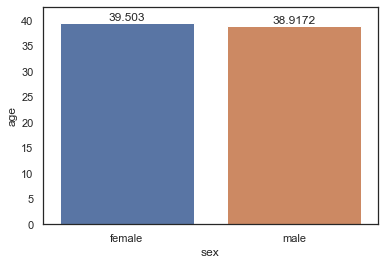

In [9]:
ax = sns.barplot(data=df, x='sex', y='age', errwidth=0)
ax = ax.bar_label(ax.containers[0])

In [10]:
#2 Average BMI of smoker and female smoker
mean_BMI_smoker = df[df.smoker == 'yes']['bmi'].mean()
print(f"BMI average of smoker: {mean_BMI_smoker}")

mean_BMI_female_smoker = df[(df.smoker == 'yes')&(df.sex == "female")]['bmi'].mean()
print(f"BMI average of female smoker: {mean_BMI_female_smoker}")

mean_BMI_male_smoker = df[(df.smoker == 'yes')&(df.sex == "male")]['bmi'].mean()
print(f"BMI average of male smoker: {mean_BMI_male_smoker}")

BMI average of smoker: 30.708448905109503
BMI average of female smoker: 29.608260869565225
BMI average of male smoker: 31.504182389937107


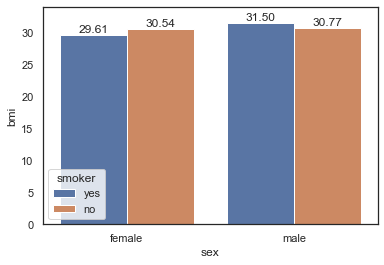

In [11]:
ax = sns.barplot(data=df, x='sex', y='bmi', hue='smoker', errwidth=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [12]:
#3 Variance of insurance charge between smoker and non smoker?
var_smoker = df[df.smoker == "yes"]['charges'].var()
print(f"Variance of smoker insurance charge : {var_smoker}")

var_nonsmoker = df[df.smoker == "no"]['charges'].var()
print(f"Variance of non-smoker insurance charge : {var_nonsmoker}")

#Variance of male smoker insurance charge
var_male_smoker = df[(df.smoker == "yes")&(df.sex == "male")]['charges'].var()
print(f"Variance of male smoker insurance charge : {var_male_smoker}")

if var_smoker == var_nonsmoker:
    print("Insurance charge variance between smoker and non-smoker are similar")
else:
    print("Insurance charge variance between smoker and non-smoker are not similar")

Variance of smoker insurance charge : 133207311.20634921
Variance of non-smoker insurance charge : 35925420.49611172
Variance of male smoker insurance charge : 125499834.43595901
Insurance charge variance between smoker and non-smoker are not similar


[Text(0, 0, '32050.2'), Text(0, 0, '8434.27')]

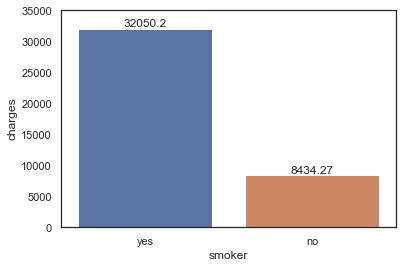

In [13]:
ax = sns.barplot(data=df, x='smoker', y='charges', errwidth=0)
ax.bar_label(ax.containers[0])

In [14]:
#4 Average age of male and female smoker
mean_male_age = df[(df.smoker == "yes")&(df.sex == "male")]['age'].mean()
print(f"Average age of male smoker : {mean_male_age}")

mean_female_age = df[(df.smoker == "yes")&(df.sex == "female")]['age'].mean()
print(f"Average age of female smoker : {mean_female_age}")

if mean_male_age == mean_female_age:
    print("Average age between male and female smoker are similar")
else:
    print("Average age between male and female smoker aren't similar")

Average age of male smoker : 38.44654088050314
Average age of female smoker : 38.608695652173914
Average age between male and female smoker aren't similar


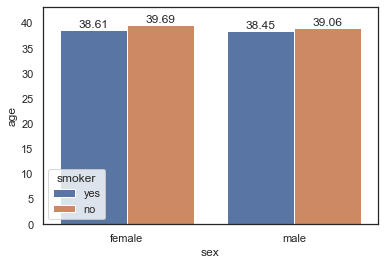

In [15]:
ax = sns.barplot(data=df, x='sex', y='age', errwidth=0, hue='smoker')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [16]:
#5 Which are the highest insurance average charges between smoker and non smoker
smoker_charges = df[df.smoker == "yes"]['charges'].mean()
print(f"Average insurance charges of smoker : {smoker_charges}")

nonsmoker_charges = df[df.smoker == "no"]['charges'].mean()
print(f"Average insurance charges of nonsmoker : {nonsmoker_charges}")

if smoker_charges > nonsmoker_charges:
    print("Average insurance charges of smoker is more expensive compared to non-smoker")
else:
    print("Average insurance charges of smoker is cheaper compared to non-smoker")

Average insurance charges of smoker : 32050.23183153285
Average insurance charges of nonsmoker : 8434.268297856199
Average insurance charges of smoker is more expensive compared to non-smoker


[Text(0, 0, '32050.2'), Text(0, 0, '8434.27')]

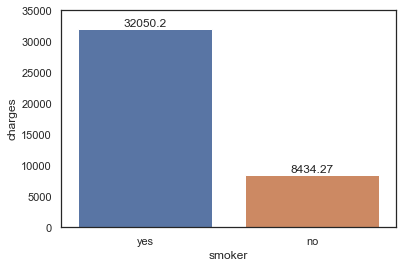

In [17]:
ax = sns.barplot(data=df, x='smoker', y='charges', errwidth=0)

ax.bar_label(ax.containers[0])

In [18]:
#6 Which are the highest? the average of smoker with BMI > 25 or non smoker with BMI > 25
filtered_df = df[df['bmi'] >= 25]

smoker_bmi_over25_charges = filtered_df[(filtered_df.smoker == "yes")]['charges'].mean()
print(f"Average insurance charges of smoker with BMI over 25 : {smoker_bmi_over25_charges}")

nonsmoker_bmi_over25_charges = filtered_df[(filtered_df.smoker == "no")]['charges'].mean()
print(f"Average insurance charges of non-smoker with BMI over 25 : {nonsmoker_bmi_over25_charges}")

if smoker_bmi_over25_charges > nonsmoker_bmi_over25_charges:
    print("Average insurance charges of smoker with BMI over 25 is more expensive compared to non-smoker with BMI over 25")
else:
    print("Average insurance charges of smoker with BMI over 25 is cheaper compared to non-smoker with BMI over 25")

Average insurance charges of smoker with BMI over 25 : 35116.90965694065
Average insurance charges of non-smoker with BMI over 25 : 8633.955125479397
Average insurance charges of smoker with BMI over 25 is more expensive compared to non-smoker with BMI over 25


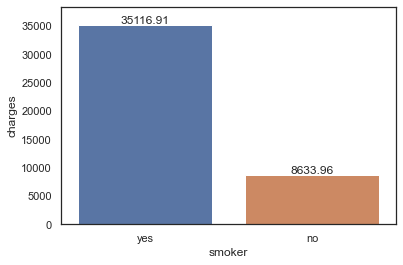

In [19]:
ax = sns.barplot(data=filtered_df, x='smoker', y='charges', errwidth=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [20]:
#7 Which are the highest BMI? A smoker or non smoker?
smoker_bmi = df[df.smoker == "yes"]['bmi'].mean()
print(f"Average smoker bmi : {smoker_bmi}")

nonsmoker_bmi = df[df.smoker == "no"]['bmi'].mean()
print(f"Average non-smoker bmi : {nonsmoker_bmi}")

if smoker_bmi > nonsmoker_bmi:
    print("BMI average for smoker is higher than non-smoker")
else:
    print("BMI average for smoker is smaller than non-smoker")

Average smoker bmi : 30.708448905109503
Average non-smoker bmi : 30.651795112781922
BMI average for smoker is higher than non-smoker


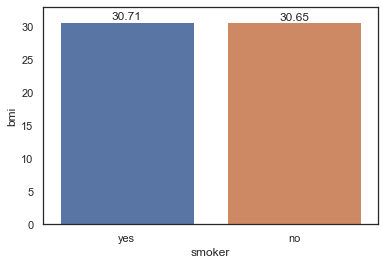

In [21]:
ax = sns.barplot(data=df, x='smoker', y='bmi', errwidth=0)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

## #2 - Discrete Variable Analysis

In [22]:
#1 Which gender has a higher charge?
male_smoker_charges = df[(df.smoker == "yes")&(df.sex =="male")]['charges'].mean()
print(f"Average insurance charges of male smoker : {male_smoker_charges}")

female_smoker_charges = df[(df.smoker == "yes")&(df.sex =="female")]['charges'].mean()
print(f"Average insurance charges of female smoker : {female_smoker_charges}")

if male_smoker_charges > female_smoker_charges:
    print("Male smoker tend to have higher insurance charges than female smoker")
else:
    print("female smoker tend to have higher insurance charges than male smoker")

Average insurance charges of male smoker : 33042.00597528302
Average insurance charges of female smoker : 30678.996276260867
Male smoker tend to have higher insurance charges than female smoker


In [23]:
df['charges'].max()

63770.42801

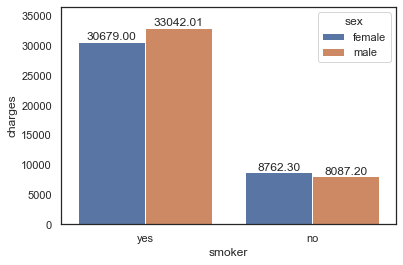

In [24]:
ax = sns.barplot(data=df, x='smoker', y='charges', errwidth=0, hue='sex')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [25]:
#2-3 Data Probability and Proportion of each region
n_northeast = df[df.region == "northeast"]['region'].count()
print(f"Total data of northeast region is : {n_northeast}")

n_northwest = df[df.region == "northwest"]['region'].count()
print(f"Total data of northwest region is : {n_northwest}")

n_southeast = df[df.region == "southeast"]['region'].count()
print(f"Total data of southeast region is : {n_southeast}")

n_southwest = df[df.region == "southwest"]['region'].count()
print(f"Total data of southwest region is : {n_southwest}")

total_region = df['region'].count()
print(f"Total data : {total_region}")

ratio_northeast = n_northeast/total_region
print(f"Ratio of northeast region is  {ratio_northeast}")

ratio_northwest = n_northwest/total_region
print(f"Ratio of northwest region is  {ratio_northwest}")

ratio_southeast = n_southeast/total_region
print(f"Ratio of southeast region is  {ratio_southeast}")

ratio_southwest = n_southwest/total_region
print(f"Ratio of southwest region is  {ratio_southwest}")

print(f"The ratio of each region isn't proportional to the total region")

Total data of northeast region is : 324
Total data of northwest region is : 325
Total data of southeast region is : 364
Total data of southwest region is : 325
Total data : 1338
Ratio of northeast region is  0.242152466367713
Ratio of northwest region is  0.2428998505231689
Ratio of southeast region is  0.27204783258594917
Ratio of southwest region is  0.2428998505231689
The ratio of each region isn't proportional to the total region


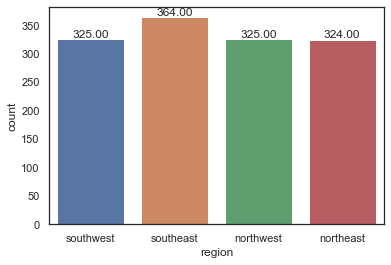

In [26]:
ax = sns.countplot(x=df["region"])

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [27]:
#4 Which one has the highest proportion smoker or non-smoker?
n_smoker = df[df.smoker == "yes"]['smoker'].count()
print(f"Total number of smoker is : {n_smoker}")

n_nonsmoker = df[df.smoker == "no"]['smoker'].count()
print(f"Total number of non-smoker is : {n_nonsmoker}")

ratio_smoker = n_smoker/total_region
print(f"Ratio of smoker is {ratio_smoker}")

ratio_nonsmoker = 1 - ratio_smoker
print(f"Ratio of non-smoker is {ratio_nonsmoker}")

if ratio_smoker > ratio_nonsmoker:
    print("Smoker data has more ratio compared to non-smoker")
else:
    print("Smoker data has smaller ratio compared to non-smoker")

Total number of smoker is : 274
Total number of non-smoker is : 1064
Ratio of smoker is 0.20478325859491778
Ratio of non-smoker is 0.7952167414050823
Smoker data has smaller ratio compared to non-smoker


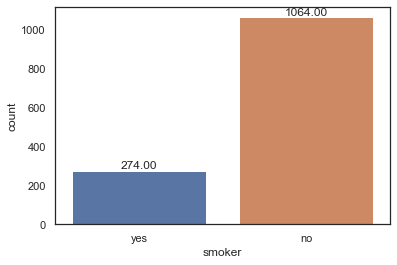

In [28]:
ax = sns.countplot(x=df["smoker"])

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

In [29]:
#5 Probability of a female and a smoker
#P(female|smoker)=P(female & smoker)/P(total smoker)
P_female_smoker = df[(df.smoker == "yes")&(df.sex =="female")]['smoker'].count() /n_smoker
print(f"Probability of a female and a smoker: {P_female_smoker}")

Probability of a female and a smoker: 0.4197080291970803


In [30]:
#6 Probability of a male and a smoker
#P(male|smoker)=P(male & smoker)/P(total smoker)
P_male_smoker = df[(df.smoker == "yes")&(df.sex =="male")]['smoker'].count() /n_smoker
print(f"Probability of a male and a smoker: {P_male_smoker}")

Probability of a male and a smoker: 0.5802919708029197


In [31]:
#7 Probability of insurance charges in each region
total_insurance_charge = df["charges"].sum()
print(f"Total insurance charge: {total_insurance_charge}")

charge_northeast = df[df.region == "northeast"]['charges'].sum()
print(f"Total insurance charge of northeast region is : {charge_northeast}")
p_charge_northeast = charge_northeast/total_insurance_charge
print(f"Probability insurance charge of northeast region is : {p_charge_northeast}" )

charge_northwest = df[df.region == "northwest"]['charges'].sum()
print(f"Total insurance charge of northwest region is : {charge_northwest}")
p_charge_northwest = charge_northwest/total_insurance_charge
print(f"Probability insurance charge of northwest region is : {p_charge_northwest}")

charge_southeast = df[df.region == "southeast"]['charges'].sum()
print(f"Total insurance charge of southeast region is : {charge_southeast}")
p_charge_southeast = charge_southeast/total_insurance_charge
print(f"Probability insurance charge of southeast region is : {p_charge_southeast}")

charge_southwest = df[df.region == "southwest"]['charges'].sum()
print(f"Total insurance charge of southwest region is : {charge_southwest}")
p_charge_southwest = charge_southwest/total_insurance_charge
print(f"Probability insurance charge of southwest region is : {p_charge_southwest}")

Total insurance charge: 17755824.990759
Total insurance charge of northeast region is : 4343668.583309
Probability insurance charge of northeast region is : 0.24463344201520673
Total insurance charge of northwest region is : 4035711.9965399997
Probability insurance charge of northwest region is : 0.2272894669011652
Total insurance charge of southeast region is : 5363689.763289999
Probability insurance charge of southeast region is : 0.30208057164798174
Total insurance charge of southwest region is : 4012754.6476200004
Probability insurance charge of southwest region is : 0.22599651943564628


Text(0, 0.5, 'Probability')

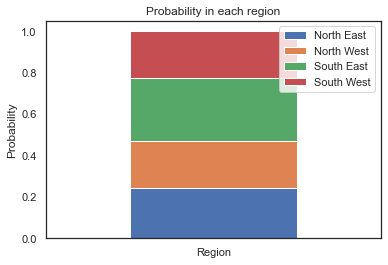

In [32]:
# Plotting Probability for Each Region
data = pd.DataFrame({'North East': [p_charge_northeast],
                     'North West': [p_charge_northwest],
                     'South East': [p_charge_southeast],
                     'South West': [p_charge_southwest]},
                    index=["Region"])
 
# create stacked bar chart for total region
data.plot(kind='bar', stacked=True, rot=0)
 
# Add Title and Labels
plt.title('Probability in each region')
plt.ylabel('Probability')

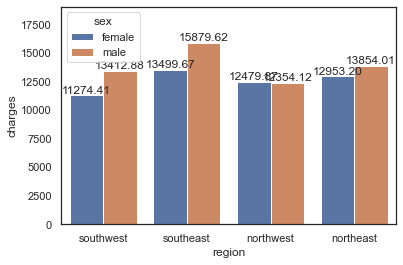

In [33]:
ax = sns.barplot(data=df, x='region', y='charges', errwidth=0, hue='sex')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

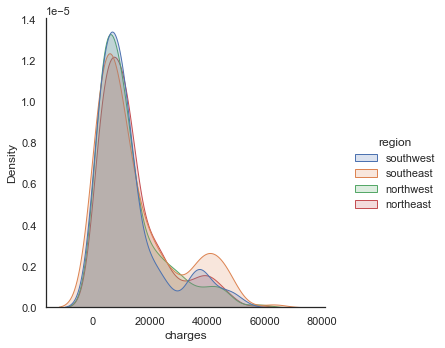

In [34]:
sns.displot(data=df, x="charges", hue="region", kind="kde", alpha=.2, fill=True)

<AxesSubplot:xlabel='charges', ylabel='Count'>

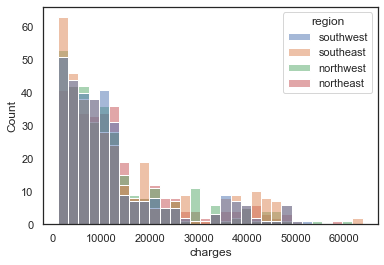

In [35]:
sns.histplot(data=df, x="charges", hue="region")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

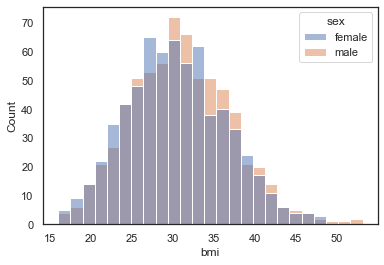

In [36]:
sns.histplot(data=df, x="bmi", hue="sex")

<AxesSubplot:xlabel='age', ylabel='Count'>

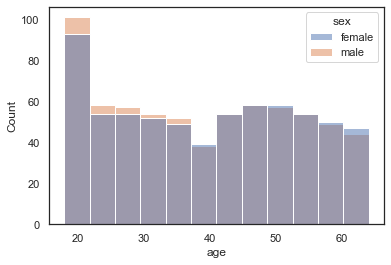

In [37]:
sns.histplot(data=df, x="age", hue="sex")

## #3 - Analysis of Continue Variable

In [38]:
#1 Which one is more likely to occur:
#- A person with BMI over 25 and charged for above 16700, or
#- A person with BMI below 25 and charged for above 16700

#User with insurance charge for over 16700
user = df[(df.charges > 16700)&(df.bmi > 25)]['charges'].count()
print(f"Number of user with insurace charge for over 16700: {user}")

BMI_over_25 = df[df.bmi > 25]['bmi'].count()
print(f"Number of user with BMI over 25: {BMI_over_25}")

prob_over_25 = user/BMI_over_25
print(f"Probability of user with BMI over 25 and insurance charge for above 16700: {prob_over_25}")

prob_below_25 = 1-prob_over_25
print(f"Probability of user with BMI below 25 and insurance charge for above 16700: {prob_below_25}")

Number of user with insurace charge for over 16700: 283
Number of user with BMI over 25: 1091
Probability of user with BMI over 25 and insurance charge for above 16700: 0.25939505041246563
Probability of user with BMI below 25 and insurance charge for above 16700: 0.7406049495875344


In [39]:
#2 Which one is more likely to happen:
#- A smoker with BMI over 25 and insurance charge for above 16700
#- A non-smoker with BMI over 25 and insurance charge for above 16700

smoker_over25 = df[(df.charges > 16700)&(df.bmi > 25)&(df.smoker=="yes")]['charges'].count()
print(f"Number of smoker with BMI over 25: {smoker_over25}")

nonsmoker_over25 = df[(df.charges > 16700)&(df.bmi > 25)&(df.smoker=="no")]['charges'].count()
print(f"Number of non-smoker with BMI over 25: {nonsmoker_over25}")

#Probability of the event
Prob1 = smoker_over25 / (smoker_over25 + nonsmoker_over25)
Prob2 = nonsmoker_over25 / (smoker_over25 + nonsmoker_over25)

print(f"Probability of smoker with BMI over 25 and insurance charge more than 16700 is: {Prob1}")

Number of smoker with BMI over 25: 215
Number of non-smoker with BMI over 25: 68
Probability of smoker with BMI over 25 and insurance charge more than 16700 is: 0.7597173144876325


## #4 - Variable Correlation Analysis


Correlation between age and insurance charge for smoker 0.36822444373077773
Age and insurance charge have a weak correlation for the beneficiary


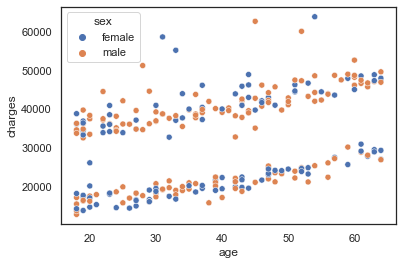

In [40]:
#Correlation between age and insurance charge for smoker
corr_age_charge_given_smoker=df[df['smoker']=='yes']['age'].corr(df['charges'])
sns.scatterplot(data=df,x=df[df['smoker']=='yes']['age'],y=df['charges'], hue="sex")
print(f"Correlation between age and insurance charge for smoker {corr_age_charge_given_smoker}")
print(f"Age and insurance charge have a weak correlation for the beneficiary")

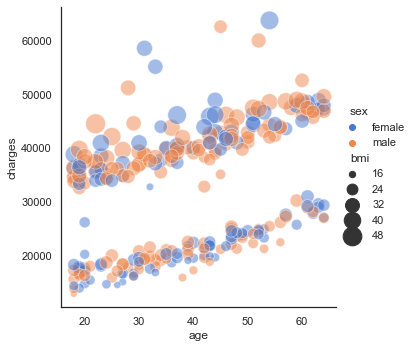

In [41]:
sns.relplot(x=df[df['smoker']=='yes']['age'], y=df["charges"], hue="sex", size="bmi",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=df)

Correlation between bmi and insurance charge for smoker 0.8064806070155405
BMI and insurance charge have a strong correlation for the beneficiary


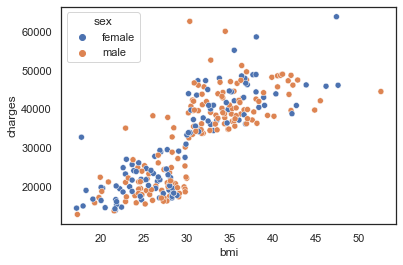

In [42]:
#Correlation between bmi and insurance charge for smoker
corr_bmi_charge_given_smoker=df[df['smoker']=='yes']['bmi'].corr(df['charges'])
sns.scatterplot(data=df,x=df[df['smoker']=='yes']['bmi'],y=df['charges'], hue="sex")
print(f"Correlation between bmi and insurance charge for smoker {corr_bmi_charge_given_smoker}")
print(f"BMI and insurance charge have a strong correlation for the beneficiary")

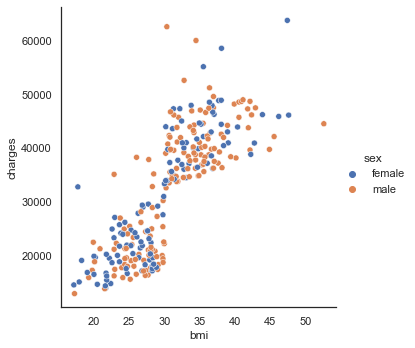

In [43]:
sns.relplot(x=df[df['smoker']=='yes']['bmi'], y=df["charges"], hue="sex",
            sizes=(40, 400),
            height=5, data=df)

## #5 - Hypotesis Testing

#1 Insurance charge for smoker is higher compared to non-smoker <br>
#2 Proportion of male smoker is bigger than the female <br>
#3 Insurance charge variance for smoker and non-smoker are similar <br>
#4 Insurance charge for a person with BMI over 25 is higher than a person with BMI below 25<br>
#5 Male insurance charge is higher than the female one<br>
<br>
Null hypothesis (H0) is a statement <br>
Alternate hypothesis (H1) is a tuntutan balik <br>
Sample Statistic (X) <br>
Critical Value (c) <br>
Significance Level (alpa) <br>

In [44]:
#1 Higher insurance charge for smoker compared to non smoker
smokers=df[df.smoker == 'yes']['charges']
smokers=smokers.to_numpy()

nonsmokers=df[df.smoker == 'no']['charges']
nonsmokers=nonsmokers.to_numpy()

In [45]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(smokers, nonsmokers, equal_var=False, alternative='greater')
print("Statistics result %.4f P-Value score is %.4f" %(stat,p))

Statistics result 32.7519 P-Value score is 0.0000


H0 is rejected due to P lesser than 0.05


In [46]:
#4 Insurance charge for beneficiary with BMI over 25 is higher than the user with BMI below 25

BMI_more_than_25=df[df.bmi >24.9]['charges']
a=BMI_more_than_25.to_numpy()

BMI_less_than_25=df[df.bmi <25]['charges']
b=BMI_less_than_25.to_numpy()

stat, p = ttest_ind(a, b, equal_var=False, alternative='greater')
print("Statistics result %.4f P-Value score is %.14f" %(stat,p))

Statistics result 5.9232 P-Value score is 0.00000000264586


In [47]:
#5 Male insurance charge is higher than female

male_charge=df[df.sex =="male"]['charges']
male_charge=male_charge.to_numpy()

female_charge=df[df.sex == "female"]['charges']
female_charge=female_charge.to_numpy()

stat, p = ttest_ind(male_charge, female_charge, equal_var=False, alternative='greater')
print("Statistics result %.4f P-Value score is %.4f" %(stat,p))

Statistics result 2.1009 P-Value score is 0.0179
